In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# Load the dataset into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Олимпиадники/text-detox/data/raw/filtered.tsv', sep='\t')

# relative path to dataset
# data = pd.read_csv('../data/raw/filtered.tsv', sep='\t')



Data research

In [3]:
data.head()

,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577777 entries, 0 to 577776
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   577777 non-null  int64  
 1   reference    577777 non-null  object 
 2   translation  577777 non-null  object 
 3   similarity   577777 non-null  float64
 4   lenght_diff  577777 non-null  float64
 5   ref_tox      577777 non-null  float64
 6   trn_tox      577777 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 30.9+ MB


In [5]:
data.describe()

,Unnamed: 0,similarity,lenght_diff,ref_tox,trn_tox
count,577777.000000,577777.000000,577777.000000,577777.000000,577777.000000
mean,288888.000000,0.758469,0.157652,0.541372,0.434490
std,166789.997578,0.092695,0.108057,0.457571,0.458904
min,0.000000,0.600001,0.000000,0.000033,0.000033
25%,144444.000000,0.681105,0.066667,0.012171,0.000707
50%,288888.000000,0.754439,0.141791,0.806795,0.085133
75%,433332.000000,0.831244,0.238095,0.990469,0.973739
max,577776.000000,0.950000,0.400000,0.999724,0.999730


In [6]:
data.isna().sum()

Unnamed: 0     0
reference      0
translation    0
similarity     0
lenght_diff    0
ref_tox        0
trn_tox        0
dtype: int64

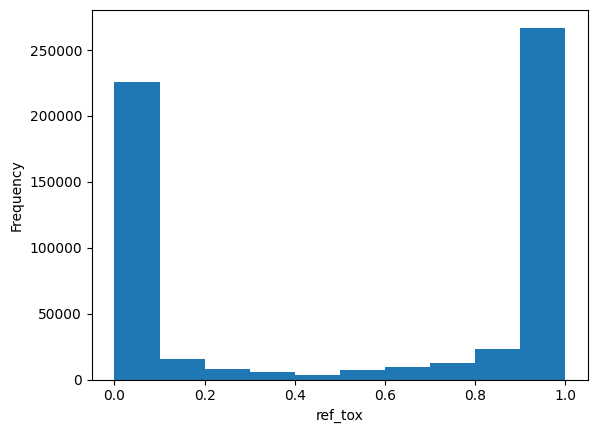

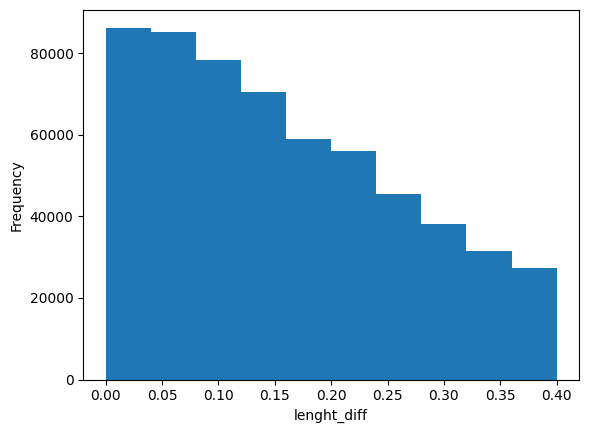

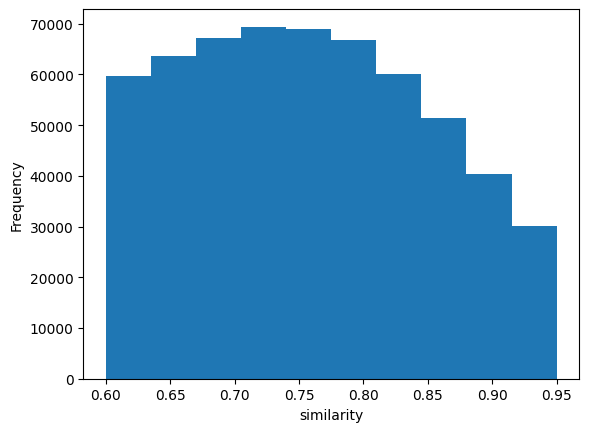

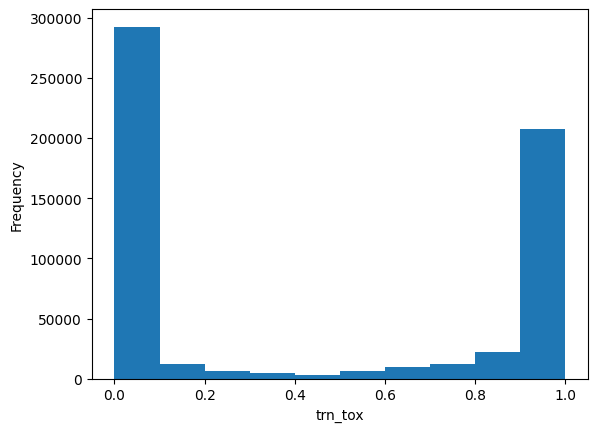

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for a numerical feature
plt.hist(data['ref_tox'])
plt.xlabel('ref_tox')
plt.ylabel('Frequency')
plt.show()

plt.hist(data['lenght_diff'])
plt.xlabel('lenght_diff')
plt.ylabel('Frequency')
plt.show()

plt.hist(data['similarity'])
plt.xlabel('similarity')
plt.ylabel('Frequency')
plt.show()

plt.hist(data['trn_tox'])
plt.xlabel('trn_tox')
plt.ylabel('Frequency')
plt.show()


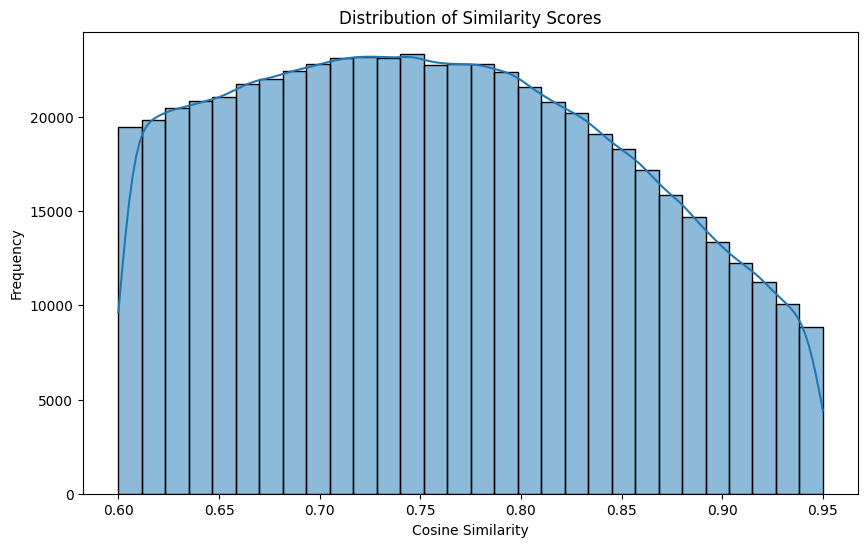

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data['similarity'], bins=30, kde=True)
plt.title('Distribution of Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.show()

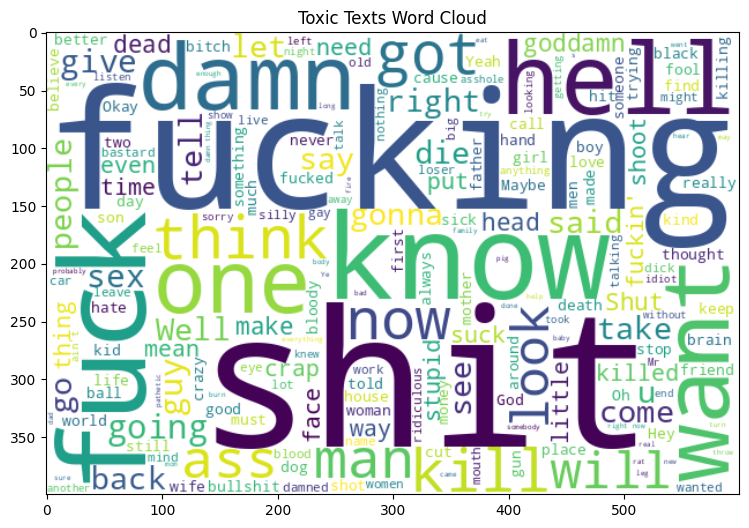

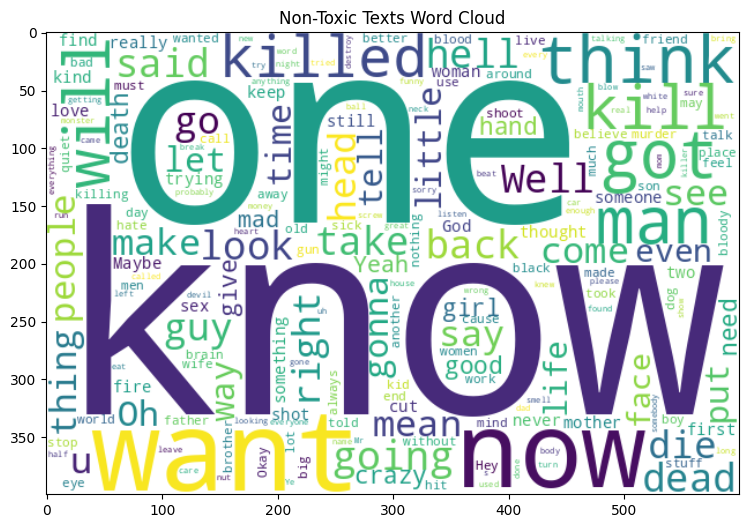

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=600, height=400, background_color='white').generate(text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.show()

toxic_text = ' '.join(data[data['ref_tox'] > 0.5]['reference'])
non_toxic_text = ' '.join(data[data['ref_tox'] <= 0.5]['reference'])

generate_wordcloud(toxic_text, 'Toxic Texts Word Cloud')
generate_wordcloud(non_toxic_text, 'Non-Toxic Texts Word Cloud')


function **make_dataset** it is a preprocceding of data and preparing data for training

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:

import sys
sys.path.append('/content/drive/MyDrive/Олимпиадники/text-detox/src/data')
import make_dataset

from make_dataset import *
train_dataset, test_dataset = main(data[:10000])


Save preprocessed data

In [12]:
train_dataset.data.to_csv(os.path.join('/content/drive/MyDrive/Олимпиадники/text-detox/data/interim', 'train_dataset.csv'), index=False)
test_dataset.data.to_csv(os.path.join('/content/drive/MyDrive/Олимпиадники/text-detox/data/interim', 'test_dataset.csv'), index=False)


In [13]:
train_dataset.data.head()

,reference,translation,lenght_diff,similarity
9254,"[And, live, as, if, you, 're, dead, ., <pad>, ...","[and, act, like, you, 're, dead, ., <pad>, <pa...",[tensor(0.0714)],[tensor(0.7091)]
1561,"[My, ass, !, He, was, trying, to, prove, himse...","[he, tried, to, prove, a, man, who, had, sex, ...",[tensor(0.3200)],[tensor(0.8206)]
1670,"[I, 'd, tell, him, to, shut, the, fuck, up, so...","[I, 'd, tell, him, to, keep, quiet, so, I, cou...",[tensor(0.2241)],[tensor(0.8551)]
6087,"[If, I, meet, the, true, death, without, havin...","[if, I, meet, with, death, without, even, kiss...",[tensor(0.0973)],[tensor(0.8952)]
6669,"[Do, you, know, that, you, were, muttering, an...","[you, know, how, you, fucked, and, drool, ,, l...",[tensor(0.0235)],[tensor(0.6378)]


In [14]:
test_dataset.data.head()

,reference,translation,lenght_diff,similarity
6252,"[I, do, n't, want, to, picture, you, naked, .,...","[I, do, n't, need, you, naked, !, <pad>, <pad>...",[tensor(0.3143)],[tensor(0.6748)]
4684,"[And, one, day, you, 're, gon, na, see, your, ...","[someday, you, 'll, see, your, father, die, ,,...",[tensor(0.1392)],[tensor(0.8919)]
1731,"[Every, fucking, time, ,, I, fuck, up, ., <pad...","[every, time, ,, I, screwed, up, ., <pad>, <pa...",[tensor(0.1613)],[tensor(0.7771)]
4742,"[If, these, low, lifes, did, n't, drain, his, ...","[if, these, scum, do, n't, dry, him, out, ,, e...",[tensor(0.2099)],[tensor(0.6233)]
4521,"[Why, do, n't, you, just, give, yourself, up, ...","[why, do, n't, you, just, get, rid, of, them, ...",[tensor(0.0270)],[tensor(0.6982)]


In [15]:
test_dataset.data['reference']


6252    [I, do, n't, want, to, picture, you, naked, .,...
4684    [And, one, day, you, 're, gon, na, see, your, ...
1731    [Every, fucking, time, ,, I, fuck, up, ., <pad...
4742    [If, these, low, lifes, did, n't, drain, his, ...
4521    [Why, do, n't, you, just, give, yourself, up, ...
                              ...                        
6412    [I, have, three, of, them, ,, total, brats, .,...
8285    [The, hateful, always, have, one, or, two, wre...
7853    [You, did, n't, learn, a, goddamn, thing, ,, d...
1095    [Do, you, want, me, to, wear, your, face, ?, <...
6929    [Mom, ,, how, do, you, unblock, the, nerve, po...
Name: reference, Length: 2000, dtype: object